In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Ler o arquivo "od_2017_norm.csv"
df = pd.read_csv('od_2017_norm.csv', sep=',')
df.head()

,Zona,Nome,População,Escolares,Empregos,Área (ha),Per Capita
0,1,Sé,0.0207,0.1120,0.7111,0.002746,0.2159
1,2,Parque Dom Pedro,0.0361,0.0252,0.5132,0.005465,0.2393
2,3,Praça João Mendes,0.1085,0.0422,0.1836,0.002296,0.3045
3,4,Ladeira da Memória,0.1526,0.0198,0.2232,0.003612,0.5103
4,5,República,0.0947,0.0304,0.8856,0.003604,0.4287


In [4]:
X = df[['População', 'Escolares', 'Empregos', 'Área (ha)', 'Per Capita']]


In [5]:
# Inicialize o modelo KMeans
# O número de clusters (n_clusters) é um parâmetro crítico que você precisa definir
kmeans = KMeans(n_clusters=3, n_init=10)  # Aqui, estamos escolhendo dividir os dados em 3 clusters

# Ajuste o modelo aos seus dados
kmeans.fit(X)


KMeans(n_clusters=3, n_init=10)

In [6]:
# Obtenha os rótulos de cluster para cada instância de dados
df['cluster'] = kmeans.labels_

# Agora, 'df' terá uma coluna adicional chamada 'cluster' com a indicação do cluster ao qual cada registro pertence

In [7]:
df

,Zona,Nome,População,Escolares,Empregos,Área (ha),Per Capita,cluster
0,1,Sé,0.0207,0.1120,0.7111,0.002746,0.2159,2
1,2,Parque Dom Pedro,0.0361,0.0252,0.5132,0.005465,0.2393,2
2,3,Praça João Mendes,0.1085,0.0422,0.1836,0.002296,0.3045,2
3,4,Ladeira da Memória,0.1526,0.0198,0.2232,0.003612,0.5103,1
4,5,República,0.0947,0.0304,0.8856,0.003604,0.4287,1
...,...,...,...,...,...,...,...,...
338,339,Cidade Universitária,0.0000,0.9549,0.2661,0.028109,0.0000,0
339,340,Butantã,0.0490,0.0323,0.1346,0.009959,0.6644,1
340,341,Jardim Caxingui,0.0668,0.0655,0.0870,0.008659,0.4633,1
341,342,Jardim Bonfiglioli,0.2261,0.0932,0.1471,0.015386,0.3857,2


In [8]:
# Determinando o valor de N (o número de observações)
# N = df.shape[0]

# Lista para armazenar os valores da soma dos quadrados dentro do cluster
ssw = []

# Garantindo que N é um inteiro, caso já não seja.
N = int(df.shape[0])

# Configurando os passos para cada zona de refinamento
step_super_fine = 1  # Super refinada: incremento de 1 em 1
step_fine = max(1, N // 50)  # Refinada média: para evitar divisão por zero e ter certeza que é pelo menos 1
step_coarse = max(1, N // 10)  # Menos refinada: para evitar divisão por zero e ter certeza que é pelo menos 1

# Definindo os limites de cada zona de refinamento
limit_super_fine_to_fine = max(3, N // 10)  # Onde a zona super refinada se encerra e a refinada média começa
limit_fine_to_coarse = N // 2  # Onde a zona refinada média se encerra e a menos refinada começa

# Intervalo para a zona super refinada (de 2 até o limite, com passo super fino)
k_values_super_fine = range(2, limit_super_fine_to_fine, step_super_fine)

# Intervalo para a zona refinada média (do fim da super refinada até o limite para a menos refinada, com passo fino)
k_values_fine = range(limit_super_fine_to_fine, limit_fine_to_coarse, step_fine)

# Intervalo para a zona menos refinada (do fim da refinada média até N, com passo mais grosso)
k_values_coarse = range(limit_fine_to_coarse, N, step_coarse)

# Concatenando todos os intervalos para formar a lista completa de valores k
k_values = list(k_values_super_fine) + list(k_values_fine) + list(k_values_coarse)

for k in k_values:
    # Executando k-means
    print(f"Executando k = {k}")
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)  # substitua 'df' pelo conjunto de características que você está usando para o agrupamento, se for diferente

    # Armazenando a soma dos quadrados dentro do cluster
    ssw.append(kmeans.inertia_)  # inertia_ é a soma das distâncias quadradas



Executando k = 2
Executando k = 3
Executando k = 4
Executando k = 5
Executando k = 6
Executando k = 7
Executando k = 8
Executando k = 9
Executando k = 10
Executando k = 11
Executando k = 12
Executando k = 13
Executando k = 14
Executando k = 15
Executando k = 16
Executando k = 17
Executando k = 18
Executando k = 19
Executando k = 20
Executando k = 21
Executando k = 22
Executando k = 23
Executando k = 24
Executando k = 25
Executando k = 26
Executando k = 27
Executando k = 28
Executando k = 29
Executando k = 30
Executando k = 31
Executando k = 32
Executando k = 33
Executando k = 34
Executando k = 40
Executando k = 46
Executando k = 52
Executando k = 58
Executando k = 64
Executando k = 70
Executando k = 76
Executando k = 82
Executando k = 88
Executando k = 94
Executando k = 100
Executando k = 106
Executando k = 112
Executando k = 118
Executando k = 124
Executando k = 130
Executando k = 136
Executando k = 142
Executando k = 148
Executando k = 154
Executando k = 160
Executando k = 166
Execut

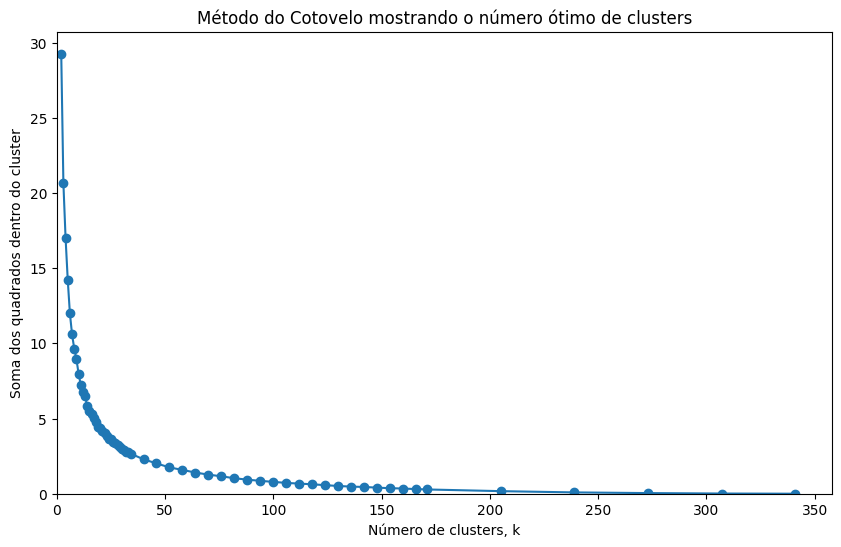

In [9]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, ssw, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Soma dos quadrados dentro do cluster')
plt.title('Método do Cotovelo mostrando o número ótimo de clusters')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

Parâmetros otimizados: a = 30.638533227122803 b = 0.14495228158326923 c = 1.3937751542530694


<Figure size 1000x600 with 0 Axes>

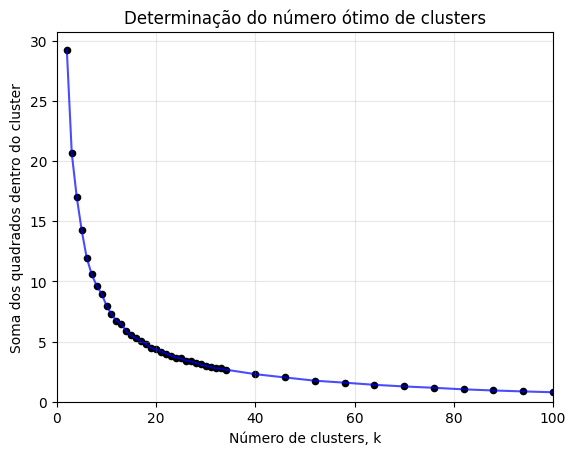

In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Definindo a forma da função exponencial decrescente.
def exp_decreasing(x, a, b, c):
    return a * np.exp(-b * x) + c

# Supondo que você tenha seus dados em listas Python, convertendo para arrays NumPy.
x_data = np.array(k_values)
y_data = np.array(ssw)

# Assegurando que não há valores não positivos em y_data
if (y_data <= 0).any():
    print("Valores não positivos encontrados em y_data; por favor, corrija isso para uso com logaritmo.")
else:
    # Ajustando a função aos dados. popt são os valores otimizados para os parâmetros da função (a, b e c)
    popt, _ = curve_fit(exp_decreasing, x_data, y_data, p0=(1, 1e-6, 1))  # p0 é o palpite inicial para os valores dos parâmetros

    # Imprimindo os parâmetros otimizados
    print("Parâmetros otimizados: a =", popt[0], "b =", popt[1], "c =", popt[2])

    # create the figure 
    plt.figure(figsize=(10, 6))

    # Usando os parâmetros otimizados para prever y com base em x
    y_pred = exp_decreasing(x_data, *popt)

    # Plotando os resultados
    plt.figure()
    plt.scatter(x_data, y_data, 20, 'black', label="Dados originais")
    plt.plot(x_data, y_data, 'b', label="Dados originais", alpha=0.7)
    
    # plt.plot(x_data, y_pred, 'r-', label="Ajuste exponencial")
    plt.xlabel("Número de clusters, k")
    plt.ylabel("Soma dos quadrados dentro do cluster")
    plt.title("Determinação do número ótimo de clusters")
    plt.xlim((0, 100))
    plt.ylim(ymin=0)
    plt.grid(True, alpha=0.3)
    # plt.legend()
    plt.show()


In [12]:
from kneed import KneeLocator

# Supondo que k_values e ssw_values sejam suas listas ou arrays de valores k e SSW, respectivamente.
kneedle = KneeLocator(k_values, ssw, curve='convex', direction='decreasing')

# O ponto do cotovelo identificado pelo método Kneedle é:
knee_point = kneedle.knee

print(f"O número ótimo de clusters sugerido pelo método Kneedle é: {knee_point}")


O número ótimo de clusters sugerido pelo método Kneedle é: 34


In [15]:
import numpy as np 

# Supondo que x_data e y_pred são seus dados de x e y ajustados/previsões da curva
# Primeira derivada
first_derivative = np.gradient(y_pred, x_data)
# Segunda derivada
second_derivative = np.gradient(first_derivative, x_data)

# Agora, procuramos onde a segunda derivada muda de sinal. 
# Como os dados podem ser ruidosos, não podemos garantir que será exatamente zero, então procuramos a mudança de sinal.

inflexion_point_index = np.where(np.diff(np.sign(second_derivative)))[0]

# Se houver múltiplos pontos de inflexão, você pode precisar selecionar o mais apropriado. 
# Aqui, estamos apenas pegando o primeiro ponto de inflexão.
if len(inflexion_point_index) > 0:
    inflexion_point_index = inflexion_point_index[0]
else:
    raise ValueError("Não foi encontrado um ponto de inflexão.")

inflexion_point_x = x_data[inflexion_point_index]
inflexion_point_y = y_pred[inflexion_point_index]

print(f"Ponto de inflexão: x = {inflexion_point_x}, y = {inflexion_point_y}")


ValueError: Não foi encontrado um ponto de inflexão.

In [16]:
# Calcula a mudança na SSW de um k para o próximo
# (você pode precisar garantir que não está dividindo por zero se ssw contiver zeros)
deltas = np.diff(ssw) / ssw[:-1]  # mudança relativa

# calcular a segunda derivada da curva
deltas2 = np.diff(deltas) / deltas[:-1]
deltas2

array([-4.03630393e-01, -7.18609411e-02, -2.98946866e-02, -2.68322593e-01,
       -2.28859608e-01, -2.15346704e-01,  5.63894690e-01, -1.63916900e-01,
       -2.10178336e-01, -4.64365646e-01,  1.52013349e+00, -4.18719359e-01,
       -2.28432424e-01,  7.52390181e-02, -6.12181103e-02,  6.30565748e-01,
       -7.31269073e-01,  1.28819800e+00, -9.65299765e-02,  4.32024995e-02,
        7.35336893e-02, -6.71239245e-01,  2.71880521e+00, -7.19975498e-01,
        1.58279344e+00, -1.41313187e-02, -1.37859025e-01,  5.35364254e-02,
        2.52010253e-01, -1.00044001e+00, -1.75076448e+03,  3.14100478e+00,
       -1.55259987e-01,  1.08343435e-01, -2.86536755e-01,  1.78225798e-01,
       -1.27675655e-01, -9.58263041e-02,  2.58618536e-01, -1.66511438e-01,
       -9.00827712e-02, -4.39502177e-02,  7.89107826e-02, -2.43797355e-01,
        1.71106122e-02,  4.31578422e-01, -2.77812369e-02, -1.08800965e-01,
       -4.35142627e-01,  1.28580920e+00, -2.23384776e-01, -1.88014928e-01,
        5.65620709e-01, -

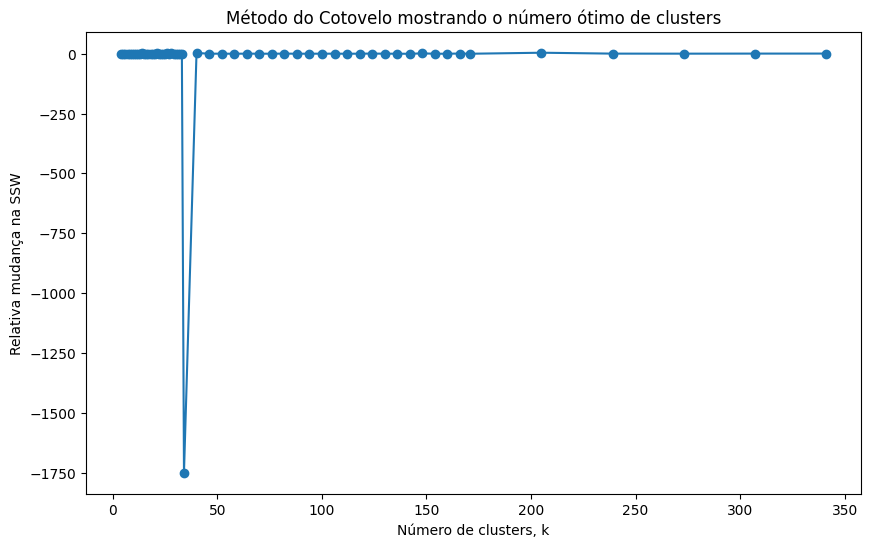

In [17]:

# plotar deltas x k
plt.figure(figsize=(10, 6))
# plt.plot(k_values[1:], deltas, '-o')
plt.plot(k_values[2:], deltas2, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Relativa mudança na SSW')
plt.title('Método do Cotovelo mostrando o número ótimo de clusters')
# plt.ylim(ymin=0)
# plt.xlim(xmin=0)
plt.show()

In [18]:
deltas2

array([-4.03630393e-01, -7.18609411e-02, -2.98946866e-02, -2.68322593e-01,
       -2.28859608e-01, -2.15346704e-01,  5.63894690e-01, -1.63916900e-01,
       -2.10178336e-01, -4.64365646e-01,  1.52013349e+00, -4.18719359e-01,
       -2.28432424e-01,  7.52390181e-02, -6.12181103e-02,  6.30565748e-01,
       -7.31269073e-01,  1.28819800e+00, -9.65299765e-02,  4.32024995e-02,
        7.35336893e-02, -6.71239245e-01,  2.71880521e+00, -7.19975498e-01,
        1.58279344e+00, -1.41313187e-02, -1.37859025e-01,  5.35364254e-02,
        2.52010253e-01, -1.00044001e+00, -1.75076448e+03,  3.14100478e+00,
       -1.55259987e-01,  1.08343435e-01, -2.86536755e-01,  1.78225798e-01,
       -1.27675655e-01, -9.58263041e-02,  2.58618536e-01, -1.66511438e-01,
       -9.00827712e-02, -4.39502177e-02,  7.89107826e-02, -2.43797355e-01,
        1.71106122e-02,  4.31578422e-01, -2.77812369e-02, -1.08800965e-01,
       -4.35142627e-01,  1.28580920e+00, -2.23384776e-01, -1.88014928e-01,
        5.65620709e-01, -

In [19]:
threshold = 0.1  # por exemplo, 10% de mudança; ajuste conforme necessário
elbow_k = np.where(deltas > threshold)[0]

# Se não encontrarmos um cotovelo abaixo do limite, escolhemos o k com a menor mudança
if len(elbow_k) == 0:
    elbow_k = np.argmin(deltas)
else:
    elbow_k = elbow_k[0]

optimal_k = k_values[elbow_k]

print(f"O número ótimo estimado de clusters é {optimal_k}")

O número ótimo estimado de clusters é 307


# clusteriza finalmente

In [26]:
# bom, o numero ótimo de clusters será dado pelo knee_point

# Agora, vamos executar o k-means com o número ótimo de clusters
# final_kmeans = KMeans(n_clusters=knee_point, n_init=10)
final_kmeans = KMeans(n_clusters=4, n_init=4)
final_kmeans.fit(X)

# Obtenha os rótulos de cluster para cada instância de dados
df['cluster'] = final_kmeans.labels_
df.head()

,Zona,Nome,População,Escolares,Empregos,Área (ha),Per Capita,cluster
0,1,Sé,0.0207,0.1120,0.7111,0.002746,0.2159,1
1,2,Parque Dom Pedro,0.0361,0.0252,0.5132,0.005465,0.2393,1
2,3,Praça João Mendes,0.1085,0.0422,0.1836,0.002296,0.3045,1
3,4,Ladeira da Memória,0.1526,0.0198,0.2232,0.003612,0.5103,3
4,5,República,0.0947,0.0304,0.8856,0.003604,0.4287,3


In [27]:
# salva num arquivo csv
df.to_csv('od_2017_norm_kmeans4.csv', index=False)
